In [213]:
import pyspedas as sps, numpy as np, math
import pytplot as tplt
import copy

#Helper Functions

def tplt_options(name, **kwargs):
    tplt.options(name, opt_dict=kwargs)

def tplotbroadcast(f, names, new_tvar=None):
    base = names[0]
    
    names = [n if n == base else tplt.tinterp(n, base) for n in names]
    base = names[0]
    
    datas = [tplt.data_quants[p].values for p in names]
    data = f(datas)

    if new_tvar is None:
        tplt.data_quants[base].values = data
        return base

    if 'spec_bins' in tplt.data_quants[base].coords:
        tplt.store_data(new_tvar, data={'x': tplt.data_quants[base].coords['time'].values, 'y': data, 'v':tplt.data_quants[base].coords['spec_bins'].values})
        tplt.data_quants[new_tvar].attrs = copy.deepcopy(tplt.data_quants[base].attrs)
    else:
        tplt.store_data(new_tvar,data={'x': tplt.data_quants[base].coords['time'].values, 'y': data})
        tplt.data_quants[new_tvar].attrs = copy.deepcopy(tplt.data_quants[base].attrs)
    return new_tvar

In [284]:
trange = ['2015-12-08/09:00',  '2015-12-08/10:30']

probe = 2
probes = [2]

sps.mms.fpi(probe=probes,  datatype=['des-moms',  'dis-moms'], center_measurement=True,  trange=trange, time_clip=True)
sps.mms.fgm(probe=probes,  trange=trange,  get_fgm_ephemeris=True, time_clip=True)
sps.mms.eis(probe=probes,  trange=trange, time_clip=True)
sps.themis.fgm(trange=trange, probe='c', time_clip=True)
sps.themis.esa(trange=trange, probe='c', time_clip=True)

03-Dec-23 23:15:12: Loading pydata\mms2\fpi\fast\l2\des-moms\2015\12\mms2_fpi_fast_l2_des-moms_20151208080000_v3.4.0.cdf
03-Dec-23 23:15:12: Loading pydata\mms2\fpi\fast\l2\des-moms\2015\12\mms2_fpi_fast_l2_des-moms_20151208100000_v3.4.0.cdf
03-Dec-23 23:15:12: Loading pydata\mms2\fpi\fast\l2\dis-moms\2015\12\mms2_fpi_fast_l2_dis-moms_20151208080000_v3.4.0.cdf
03-Dec-23 23:15:12: Loading pydata\mms2\fpi\fast\l2\dis-moms\2015\12\mms2_fpi_fast_l2_dis-moms_20151208100000_v3.4.0.cdf
03-Dec-23 23:15:15: Time clip was applied to: mms2_des_errorflags_fast
03-Dec-23 23:15:15: Time clip was applied to: mms2_des_startdelphi_count_fast
03-Dec-23 23:15:15: Time clip was applied to: mms2_des_startdelphi_angle_fast
03-Dec-23 23:15:15: Time clip was applied to: mms2_des_pitchangdist_lowen_fast
03-Dec-23 23:15:15: Time clip was applied to: mms2_des_pitchangdist_miden_fast
03-Dec-23 23:15:15: Time clip was applied to: mms2_des_pitchangdist_highen_fast
03-Dec-23 23:15:15: Time clip was applied to: mms2_

03-Dec-23 23:15:18: mms2_des_energy_fast
03-Dec-23 23:15:18: mms2_des_energy_delta_fast
03-Dec-23 23:15:18: mms2_des_temppara_fast
03-Dec-23 23:15:18: mms2_des_tempperp_fast
03-Dec-23 23:15:18: mms2_dis_errorflags_fast
03-Dec-23 23:15:18: mms2_dis_compressionloss_fast
03-Dec-23 23:15:18: mms2_dis_startdelphi_count_fast
03-Dec-23 23:15:18: mms2_dis_startdelphi_angle_fast
03-Dec-23 23:15:18: mms2_dis_energyspectr_px_fast
03-Dec-23 23:15:18: mms2_dis_energyspectr_mx_fast
03-Dec-23 23:15:18: mms2_dis_energyspectr_py_fast
03-Dec-23 23:15:18: mms2_dis_energyspectr_my_fast
03-Dec-23 23:15:18: mms2_dis_energyspectr_pz_fast
03-Dec-23 23:15:18: mms2_dis_energyspectr_mz_fast
03-Dec-23 23:15:18: mms2_dis_energyspectr_omni_fast
03-Dec-23 23:15:18: mms2_dis_spectr_bg_fast
03-Dec-23 23:15:18: mms2_dis_numberdensity_bg_fast
03-Dec-23 23:15:18: mms2_dis_numberdensity_fast
03-Dec-23 23:15:18: mms2_dis_numberdensity_err_fast
03-Dec-23 23:15:18: mms2_dis_densityextrapolation_low_fast
03-Dec-23 23:15:18: m

03-Dec-23 23:16:08: Time clip was applied to: mms2_epd_eis_srvy_l2_extof_helium_P3_cps_t5
03-Dec-23 23:16:08: Time clip was applied to: mms2_epd_eis_srvy_l2_extof_helium_P3_flux_t0
03-Dec-23 23:16:08: Time clip was applied to: mms2_epd_eis_srvy_l2_extof_helium_P3_flux_t1
03-Dec-23 23:16:08: Time clip was applied to: mms2_epd_eis_srvy_l2_extof_helium_P3_flux_t2
03-Dec-23 23:16:08: Time clip was applied to: mms2_epd_eis_srvy_l2_extof_helium_P3_flux_t3
03-Dec-23 23:16:08: Time clip was applied to: mms2_epd_eis_srvy_l2_extof_helium_P3_flux_t4
03-Dec-23 23:16:08: Time clip was applied to: mms2_epd_eis_srvy_l2_extof_helium_P3_flux_t5
03-Dec-23 23:16:09: Time clip was applied to: mms2_epd_eis_srvy_l2_extof_oxygen_P3_counts_t0
03-Dec-23 23:16:09: Time clip was applied to: mms2_epd_eis_srvy_l2_extof_oxygen_P3_counts_t1
03-Dec-23 23:16:09: Time clip was applied to: mms2_epd_eis_srvy_l2_extof_oxygen_P3_counts_t2
03-Dec-23 23:16:09: Time clip was applied to: mms2_epd_eis_srvy_l2_extof_oxygen_P3_co

03-Dec-23 23:16:14: The name mms2_epd_eis_srvy_l2_extof_helium_t0_energy_dplus_spin is currently not in pytplot
03-Dec-23 23:16:16: Loaded variables:
03-Dec-23 23:16:16: Epoch
03-Dec-23 23:16:16: Time_Minus
03-Dec-23 23:16:16: Time_Plus
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_duration
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_deadtime
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_largepixel
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_starttai
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_midtai
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_endtai
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_spin
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_sector
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_quality
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_proton_P3_counts_t0
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_proton_P3_counts_t1
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_proton_P3_counts_t2
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_proton_P3_counts_t3


03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_counts_t4
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_counts_t5
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_cps_t0
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_cps_t1
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_cps_t2
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_cps_t3
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_cps_t4
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_cps_t5
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_flux_t0
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_flux_t1
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_flux_t2
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_flux_t3
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_flux_t4
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_dump_P3_flux_t5
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_pitch_angle_t0
03-Dec-23 23:16:16: mms2_epd_eis_srvy_l2_extof_pitch_angle

03-Dec-23 23:16:37: Unable to get ydata for variable thc_peir_t3Q
03-Dec-23 23:16:37: Unable to get ydata for variable thc_peir_magt3Q
03-Dec-23 23:16:37: Unable to get ydata for variable thc_peir_ptensQ
03-Dec-23 23:16:37: Unable to get ydata for variable thc_peir_mftensQ
03-Dec-23 23:16:37: Unable to get ydata for variable thc_peir_fluxQ
03-Dec-23 23:16:37: Unable to get ydata for variable thc_peir_symmQ
03-Dec-23 23:16:37: Unable to get ydata for variable thc_peir_symm_angQ
03-Dec-23 23:16:37: Unable to get ydata for variable thc_peir_magfQ
03-Dec-23 23:16:37: Unable to get ydata for variable thc_peir_velocity_dslQ
03-Dec-23 23:16:37: Unable to get ydata for variable thc_peir_velocity_gseQ
03-Dec-23 23:16:37: Unable to get ydata for variable thc_peir_velocity_gsmQ
03-Dec-23 23:16:37: Unable to get ydata for variable thc_peer_densityQ
03-Dec-23 23:16:38: Unable to get ydata for variable thc_peer_avgtempQ
03-Dec-23 23:16:38: Unable to get ydata for variable thc_peer_vthermalQ
03-Dec-2

['thc_peif_data_quality',
 'thc_peef_data_quality',
 'thc_peir_data_quality',
 'thc_peer_data_quality',
 'thc_peif_density',
 'thc_peif_avgtemp',
 'thc_peif_vthermal',
 'thc_peif_sc_pot',
 'thc_peif_en_eflux',
 'thc_peif_t3',
 'thc_peif_magt3',
 'thc_peif_ptens',
 'thc_peif_mftens',
 'thc_peif_flux',
 'thc_peif_symm',
 'thc_peif_symm_ang',
 'thc_peif_magf',
 'thc_peif_velocity_dsl',
 'thc_peif_velocity_gse',
 'thc_peif_velocity_gsm',
 'thc_peef_density',
 'thc_peef_avgtemp',
 'thc_peef_vthermal',
 'thc_peef_sc_pot',
 'thc_peef_en_eflux',
 'thc_peef_t3',
 'thc_peef_magt3',
 'thc_peef_ptens',
 'thc_peef_mftens',
 'thc_peef_flux',
 'thc_peef_symm',
 'thc_peef_symm_ang',
 'thc_peef_magf',
 'thc_peef_velocity_dsl',
 'thc_peef_velocity_gse',
 'thc_peef_velocity_gsm',
 'thc_peir_density',
 'thc_peir_avgtemp',
 'thc_peir_vthermal',
 'thc_peir_sc_pot',
 'thc_peir_en_eflux',
 'thc_peir_t3',
 'thc_peir_magt3',
 'thc_peir_ptens',
 'thc_peir_mftens',
 'thc_peir_flux',
 'thc_peir_symm',
 'thc_peir_s

In [285]:
tplotbroadcast(lambda d: d[0], ['mms2_epd_eis_srvy_l2_extof_proton_flux_omni'], new_tvar='proton_flux')
tplotbroadcast(lambda d: d[0], ['mms2_epd_eis_srvy_l2_extof_helium_flux_omni'], new_tvar='helium_flux')
tplotbroadcast(lambda d: d[0], ['mms2_epd_eis_srvy_l2_extof_oxygen_flux_omni'], new_tvar='oxygen_flux')
tplotbroadcast(lambda d: d[0], ['mms2_fgm_b_gsm_srvy_l2_bvec'], new_tvar='b_field')

sps.cotrans('mms2_dis_bulkv_gse_fast',  'bulkv',  coord_in='gse',  coord_out='gsm')

IonN = 'mms2_dis_numberdensity_fast'
ElecN = 'mms2_des_numberdensity_fast'
IonSpec = 'mms2_dis_energyspectr_omni_fast'
ElecSpec = 'mms2_des_energyspectr_omni_fast'
ThermFGM = 'thc_fgs_gsm'
ThermEsaIon = 'thc_peif_density'

tplotbroadcast(lambda d: d[0]**2 /(10 * 4*math.pi*10**-7 * 1E6), ['thc_fgl_btotal'], new_tvar='solar_wind_pressure')

tplotbroadcast(lambda d: (d[0][:, 0, 0]**2 + d[0][:, 1, 1]**2 + d[0][:, 2, 2]**2)**.5, ['mms2_dis_prestensor_gse_fast'], new_tvar='total_pressure')

03-Dec-23 23:16:53: ['gse', 'gsm']
03-Dec-23 23:16:53: Running transformation: subgse2gsm
03-Dec-23 23:16:53: Output variable: bulkv


'total_pressure'

05-Dec-23 07:07:16: C:\Users\JohnB\OneDrive\School\Space Physics\Spedas\venv\lib\site-packages\pytplot\MPLPlotter\specplot.py:105: RuntimeWarning: divide by zero encountered in log10
  zdata = np.log10(out_values)

05-Dec-23 07:07:17: C:\Users\JohnB\OneDrive\School\Space Physics\Spedas\venv\lib\site-packages\pytplot\MPLPlotter\specplot.py:105: RuntimeWarning: divide by zero encountered in log10
  zdata = np.log10(out_values)

05-Dec-23 07:07:17: C:\Users\JohnB\OneDrive\School\Space Physics\Spedas\venv\lib\site-packages\pytplot\MPLPlotter\specplot.py:105: RuntimeWarning: divide by zero encountered in log10
  zdata = np.log10(out_values)



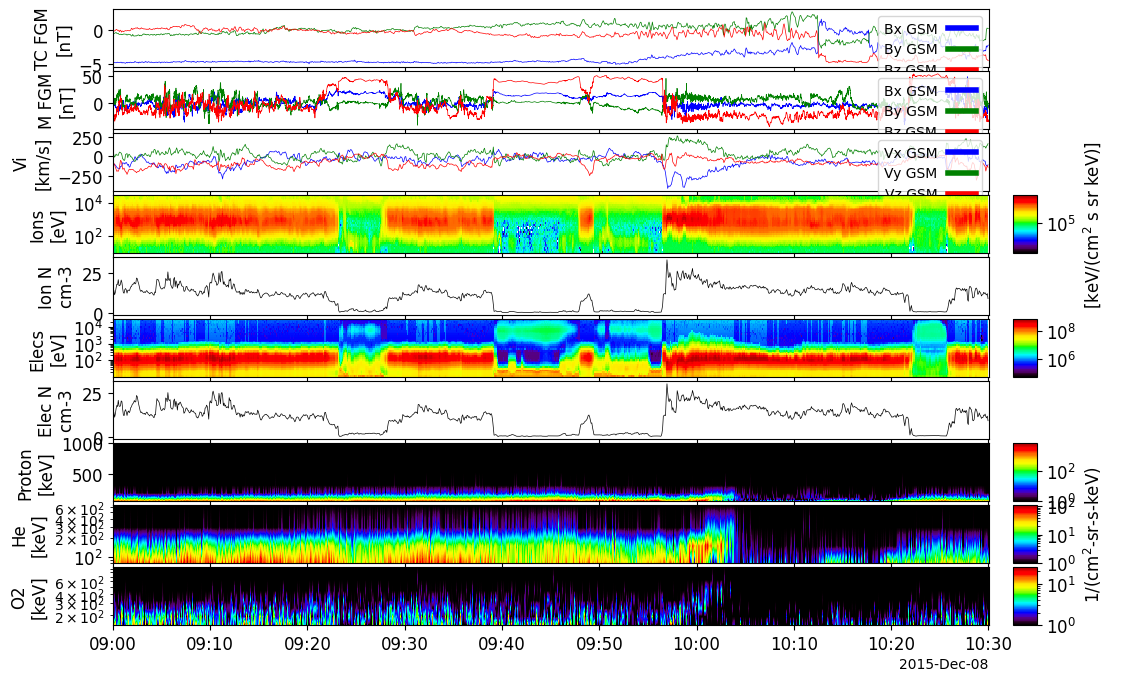

In [304]:
tplt_options('b_field', ytitle='M FGM', black_background=True)
tplt_options('proton_flux',  ytitle='Proton', ysubtitle='[keV]', ztitle='', ylog=0)
tplt_options('helium_flux',  ytitle='He',  ysubtitle='[keV]')
tplt_options('oxygen_flux',  ytitle='O2',  ysubtitle='[keV]', ztitle='')

tplt_options(IonSpec,  ytitle = 'Ions',  ysubtitle = '[eV]')
tplt_options(ElecSpec,  ytitle = 'Elecs',  ysubtitle = '[eV]', ztitle='')
tplt_options(IonN,  ytitle = 'Ion N',  ysubtitle = 'cm^-3')
tplt_options(ElecN,  ytitle = 'Elec N',  ysubtitle = 'cm^-3')
tplt_options('bulkv', ytitle='Vi')
tplt_options('total_pressure',  ytitle = 'Pt',  ysubtitle = '[nPa]')

tplt_options(ThermFGM, ytitle="TC FGM", ysubtitle='[nT]')
tplt_options(ThermEsaIon, ytitle="Ion N", ysubtitle='[cm^3]')
tplt_options('solar_wind_pressure', ytitle="Psw", ysubtitle='[nPa]')


figs = [     ThermFGM,
        
           #  'solar_wind_pressure',
        
            'b_field', 
            'bulkv',
            IonSpec,
            IonN,
            ElecSpec,
            ElecN,
        
          #  'total_pressure',
        
            'proton_flux',
            'helium_flux',
            'oxygen_flux']

tplt.tplot(figs, save_png='C:/Users/JohnB/OneDrive/School/Space Physics/Spedas/main_event')

03-Dec-23 23:17:38: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/tha/l2/esa/2015/
03-Dec-23 23:17:38: File is current: themis_data/tha/l2/esa/2015/tha_l2_esa_20151208_v01.cdf
03-Dec-23 23:17:39: Unable to get ydata for variable tha_peif_densityQ
03-Dec-23 23:17:39: Unable to get ydata for variable tha_peif_avgtempQ
03-Dec-23 23:17:39: Unable to get ydata for variable tha_peif_vthermalQ
03-Dec-23 23:17:39: Unable to get ydata for variable tha_peif_sc_potQ
03-Dec-23 23:17:39: Unable to get ydata for variable tha_peif_en_efluxQ
03-Dec-23 23:17:39: Unable to get ydata for variable tha_peif_t3Q
03-Dec-23 23:17:39: Unable to get ydata for variable tha_peif_magt3Q
03-Dec-23 23:17:39: Unable to get ydata for variable tha_peif_ptensQ
03-Dec-23 23:17:39: Unable to get ydata for variable tha_peif_mftensQ
03-Dec-23 23:17:39: Unable to get ydata for variable tha_peif_fluxQ
03-Dec-23 23:17:39: Unable to get ydata for variable tha_peif_symmQ
03-Dec-23 23:17:39: Unable to get y

03-Dec-23 23:18:01: Time clip was applied to: tha_peif_velocity_dsl
03-Dec-23 23:18:01: Time clip was applied to: tha_peif_velocity_gse
03-Dec-23 23:18:01: Time clip was applied to: tha_peif_velocity_gsm
03-Dec-23 23:18:01: Time clip was applied to: tha_peef_density
03-Dec-23 23:18:01: Time clip was applied to: tha_peef_avgtemp
03-Dec-23 23:18:01: Time clip was applied to: tha_peef_vthermal
03-Dec-23 23:18:01: Time clip was applied to: tha_peef_sc_pot
03-Dec-23 23:18:01: Time clip was applied to: tha_peef_en_eflux
03-Dec-23 23:18:01: Time clip was applied to: tha_peef_t3
03-Dec-23 23:18:01: Time clip was applied to: tha_peef_magt3
03-Dec-23 23:18:02: Time clip was applied to: tha_peef_ptens
03-Dec-23 23:18:02: Time clip was applied to: tha_peef_mftens
03-Dec-23 23:18:02: Time clip was applied to: tha_peef_flux
03-Dec-23 23:18:02: Time clip was applied to: tha_peef_symm
03-Dec-23 23:18:02: Time clip was applied to: tha_peef_symm_ang
03-Dec-23 23:18:02: Time clip was applied to: tha_peef

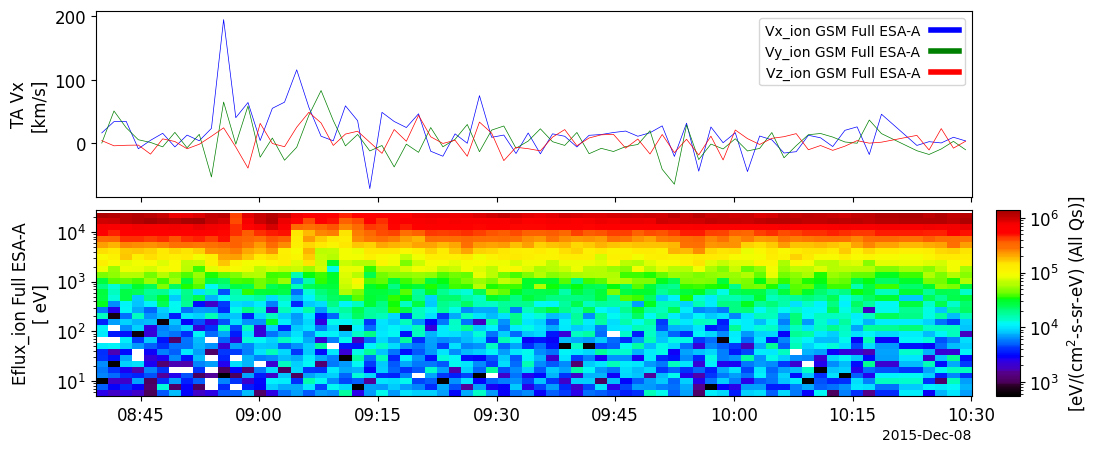

In [287]:
trange = ['2015-12-08/08:40',  '2015-12-08/10:30']

sps.themis.esa(trange=trange, probe='a', time_clip=True)

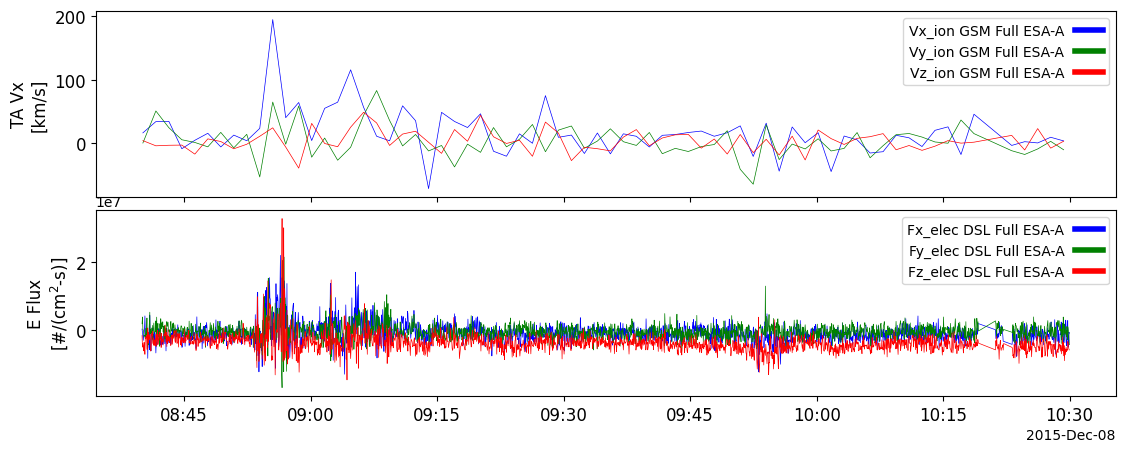

In [296]:
tplt_options('tha_peif_velocity_gsm', ytitle="TA Vx", ysubtitle='[km/s]')
tplt_options('tha_peef_flux', ytitle="E Flux", ysubtitle='[#/(cm^2-s)]')

figs = ['tha_peif_velocity_gsm', 'tha_peef_flux']

tplt.tplot(figs, save_png='C:/Users/JohnB/OneDrive/School/Space Physics/Spedas/preventa')

05-Dec-23 06:19:57: C:\Users\JohnB\OneDrive\School\Space Physics\Spedas\venv\lib\site-packages\pytplot\MPLPlotter\specplot.py:105: RuntimeWarning: divide by zero encountered in log10
  zdata = np.log10(out_values)

05-Dec-23 06:19:58: C:\Users\JohnB\OneDrive\School\Space Physics\Spedas\venv\lib\site-packages\pytplot\MPLPlotter\specplot.py:105: RuntimeWarning: divide by zero encountered in log10
  zdata = np.log10(out_values)

05-Dec-23 06:19:58: C:\Users\JohnB\OneDrive\School\Space Physics\Spedas\venv\lib\site-packages\pytplot\MPLPlotter\specplot.py:105: RuntimeWarning: divide by zero encountered in log10
  zdata = np.log10(out_values)



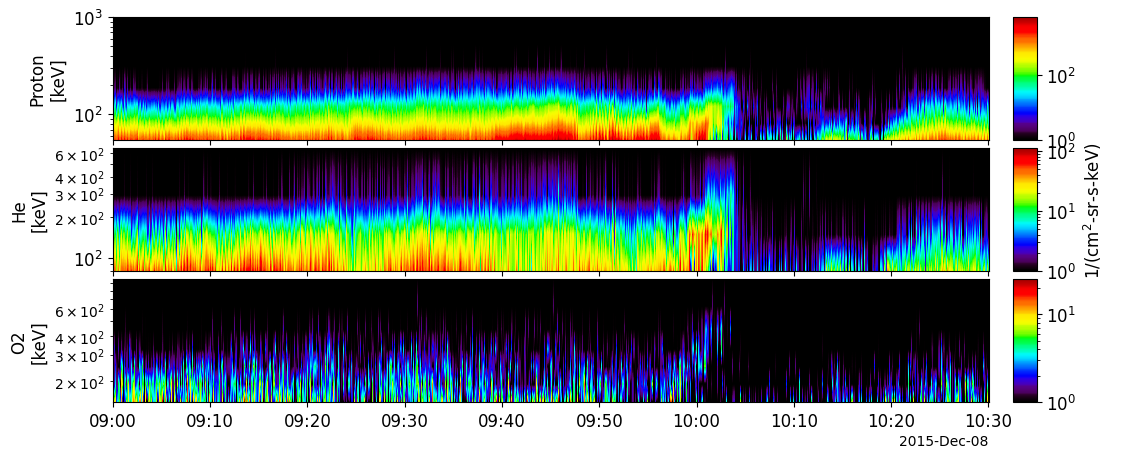

In [302]:
tplt_options('proton_flux',  ytitle='Proton', ysubtitle='[keV]', ztitle='', ylog=1)
tplt_options('helium_flux',  ytitle='He',  ysubtitle='[keV]', ylog=1)
tplt_options('oxygen_flux',  ytitle='O2',  ysubtitle='[keV]', ztitle='',ylog=1)


figs = ['proton_flux',
        'helium_flux',
        'oxygen_flux']

tplt.tplot(figs, save_png='C:/Users/JohnB/OneDrive/School/Space Physics/Spedas/eventoverview')